# Overview

    Bitcoin is a decentralized digital currency that can be transferred on the peer-to-peer bitcoin network. Bitcoin transactions are verified by network nodes through cryptography and recorded in a public distributed ledger called a blockchain. The cryptocurrency was invented in 2008 by an unknown person or group of people using the name Satoshi Nakamoto.The currency began use in 2009, when its implementation was released as open-source software.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

file_path = 'btc-usd-max.csv'

In [3]:
dataset = pd.read_csv(file_path)
dataset.head()

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03 00:00:00.000,286.572,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04 00:00:00.000,260.936,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05 00:00:00.000,273.220,1.550381e+08,3.740880e+09,bitcoin


In [4]:
dataset.describe()

,price,total_volume,market_cap
count,3148.000000,3.148000e+03,3.147000e+03
mean,14261.442289,1.683578e+10,2.656555e+11
std,16105.097826,1.890987e+10,3.056825e+11
min,172.147900,1.823845e+07,2.362640e+09
25%,1053.001875,1.261921e+09,1.700950e+10
50%,8170.065938,9.780472e+09,1.436239e+11
75%,21596.161499,2.743689e+10,4.130194e+11
max,67617.015545,1.788941e+11,1.278798e+12


In [5]:
dataset.isnull().sum()

date            0
price           0
total_volume    0
market_cap      1
coin_name       0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
start_date = pd.to_datetime(dataset.date[0])
end_date = pd.to_datetime(dataset.date.values[-1])
dataset['date'] = pd.to_datetime(dataset['date'])

In [7]:
dataset.tail()

,date,price,total_volume,market_cap,coin_name
3143,2023-08-11,29423.818916,8.106254e+09,5.724142e+11,bitcoin
3144,2023-08-12,29396.847971,4.651950e+09,5.719766e+11,bitcoin
3145,2023-08-13,29412.142275,3.994298e+09,5.722578e+11,bitcoin
3146,2023-08-14,29284.969714,4.755220e+09,5.696871e+11,bitcoin
3147,2023-08-15,29400.586804,1.240836e+10,5.722427e+11,bitcoin


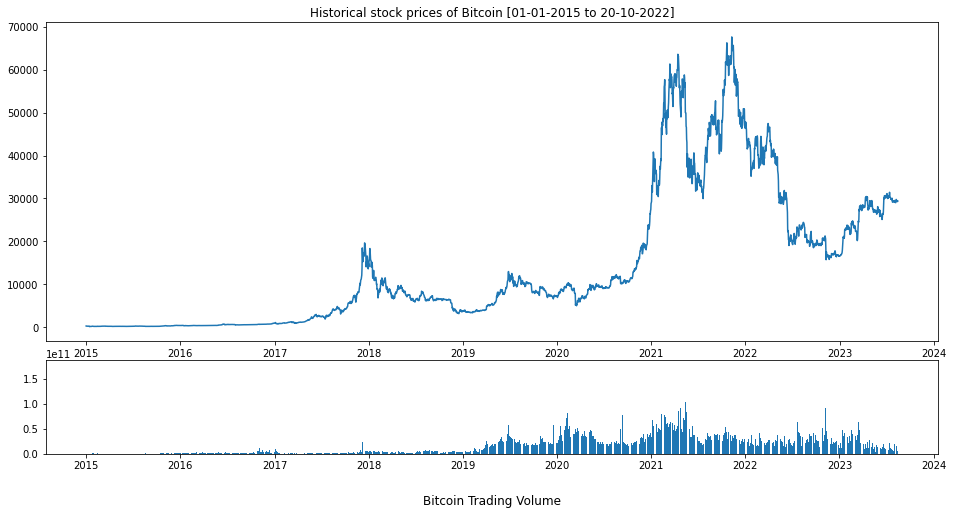

In [8]:
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(dataset.date, dataset["price"])
plt.title('Historical stock prices of Bitcoin [01-01-2015 to 20-10-2022]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(dataset.date, dataset['total_volume'])
plt.title('\nBitcoin Trading Volume', y=-0.60)
plt.gcf().set_size_inches(16,10)

In [9]:
dataset.describe()

,price,total_volume,market_cap
count,3148.000000,3.148000e+03,3.147000e+03
mean,14261.442289,1.683578e+10,2.656555e+11
std,16105.097826,1.890987e+10,3.056825e+11
min,172.147900,1.823845e+07,2.362640e+09
25%,1053.001875,1.261921e+09,1.700950e+10
50%,8170.065938,9.780472e+09,1.436239e+11
75%,21596.161499,2.743689e+10,4.130194e+11
max,67617.015545,1.788941e+11,1.278798e+12


In [10]:
dataset['price'].dtype

dtype('float64')

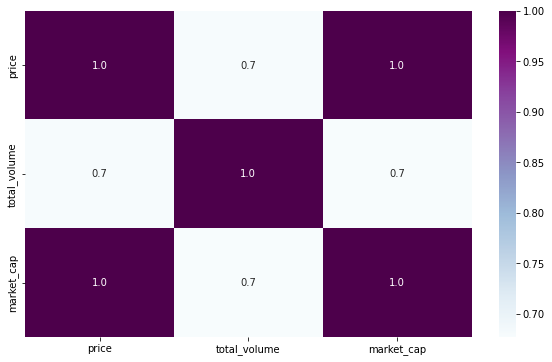

In [11]:
import seaborn as sns
# plotting correlation heatmap
plt.figure(figsize = (10, 6))
dataplot = sns.heatmap(dataset[['price', 'total_volume', 'market_cap']].corr(), cmap="BuPu", annot=True, 
                      fmt=".1f")
plt.show()

In [12]:
dataset2 = dataset[['price', 'total_volume']]
dataset2.head()

,price,total_volume
0,313.992,4.699936e+07
1,314.446,3.885591e+07
2,286.572,1.187789e+08
3,260.936,2.055001e+08
4,273.220,1.550381e+08


In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset2.price.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.5739376691905862
p-value: 0.49667086826375734
Critial Values:
   1%, -3.4324490031269144
Critial Values:
   5%, -2.862467409249606
Critial Values:
   10%, -2.567263682135347


In [14]:
from numpy import log

result = adfuller((log(dataset2.price.values)), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.326174872439021
p-value: 0.617113841781466
Critial Values:
   1%, -3.432429644737677
Critial Values:
   5%, -2.862458859056656
Critial Values:
   10%, -2.567259130154472


In [15]:
from statsmodels.tsa.stattools import kpss

result = kpss(dataset2['price'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}');


KPSS Statistic: 6.064781
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [20]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

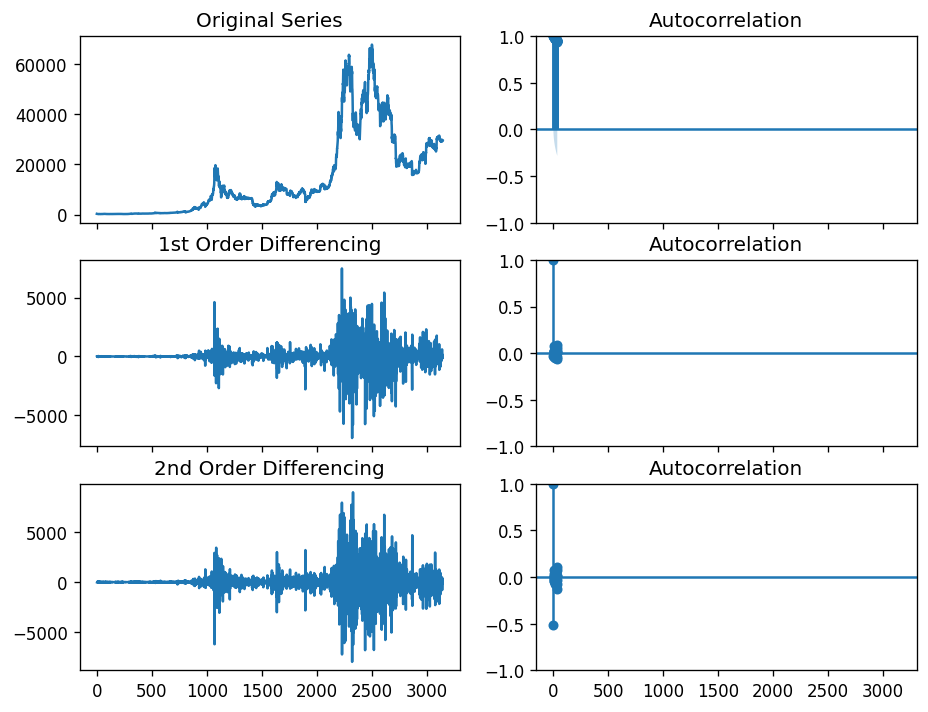

In [21]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(dataset2['price'].values); axes[0, 0].set_title('Original Series')
plot_acf(dataset2['price'].values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(dataset2['price'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(dataset2['price'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(dataset2['price'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(dataset2['price'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

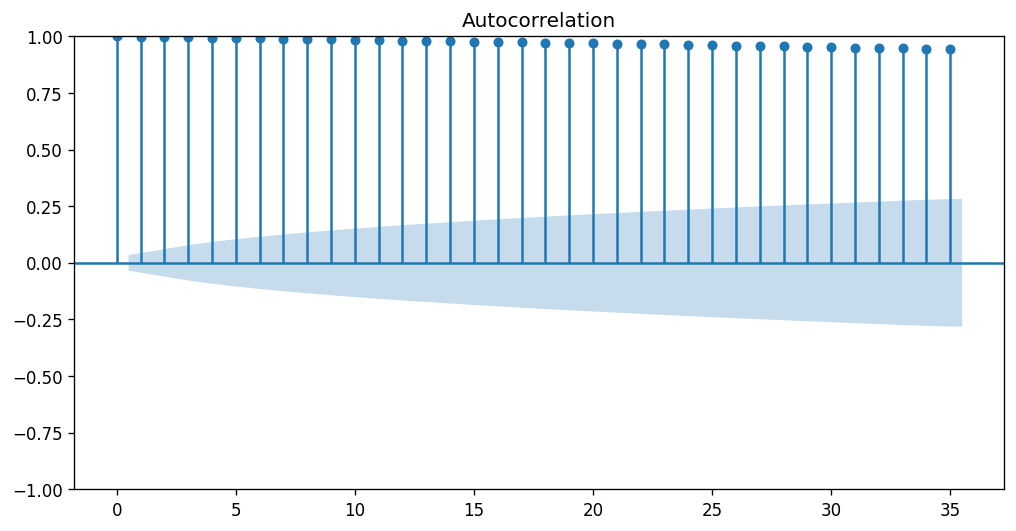

In [22]:
plt.rc("figure", figsize=(10,5))
plot_acf(dataset2['price'])
print()

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


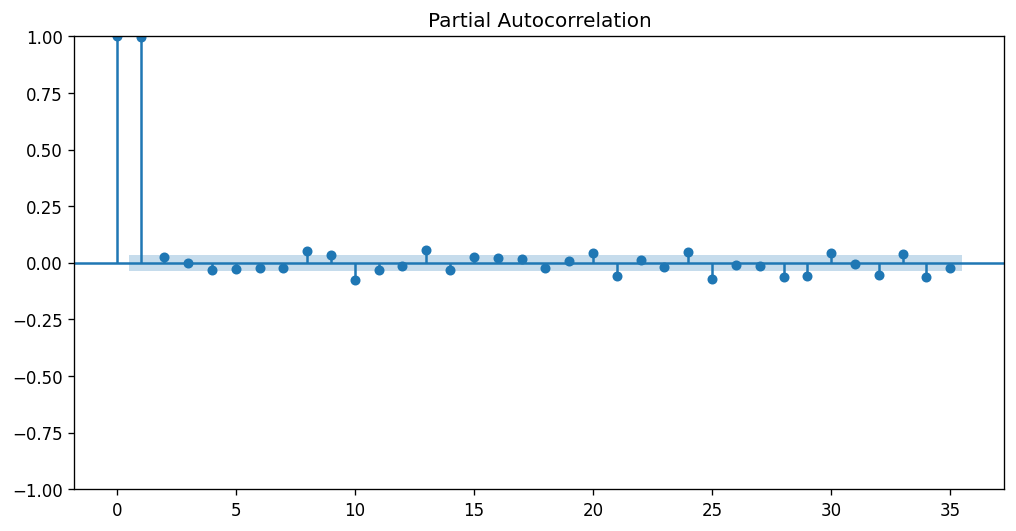

In [23]:
plt.rc("figure", figsize=(10,5))
plot_pacf(dataset2['price'])
print()

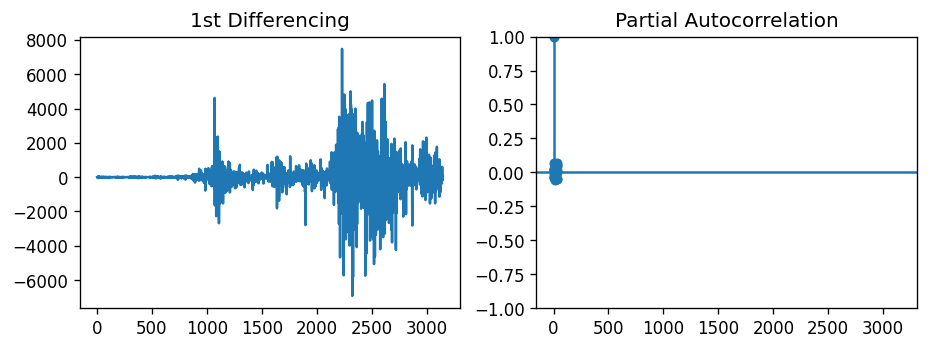

In [24]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(dataset2['price'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(dataset2['price'].diff().dropna(), ax=axes[1])

plt.show()

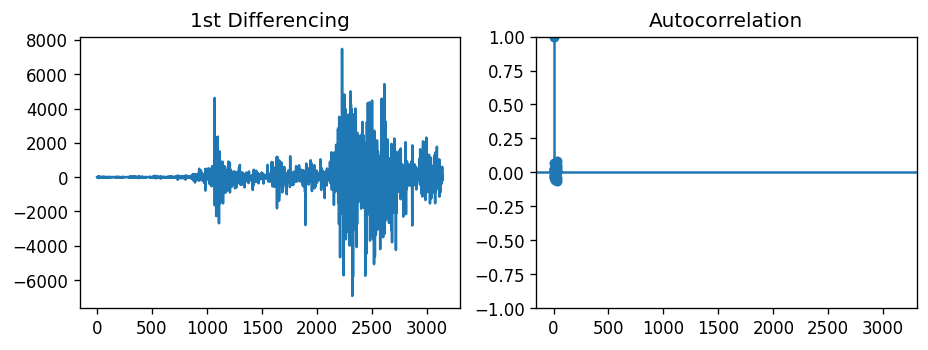

In [25]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(dataset2['price'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(dataset2['price'].diff().dropna(), ax=axes[1])

plt.show()

In [26]:
data = dataset2['price'].values
print('Length of Total data: ', len(data))
train_length = int(len(data) * 0.8)
train_data = data[:train_length]
test_data = data[train_length:]
print('Train and Test data length: ', len(train_data), len(test_data))

Length of Total data:  3148
Train and Test data length:  2518 630


In [27]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,0,8))
model_fit = model.fit(low_memory = False)
print(model_fit.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2518
Model:                 ARIMA(1, 0, 8)   Log Likelihood              -20244.759
Date:                Tue, 15 Aug 2023   AIC                          40511.517
Time:                        20:03:27   BIC                          40575.660
Sample:                             0   HQIC                         40534.796
                               - 2518                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.059e+04     48.844    216.748      0.000    1.05e+04    1.07e+04
ar.L1          0.9996      0.000   2439.567      0.000       0.999       1.000
ma.L1         -0.0279      0.010     -2.873      0.0

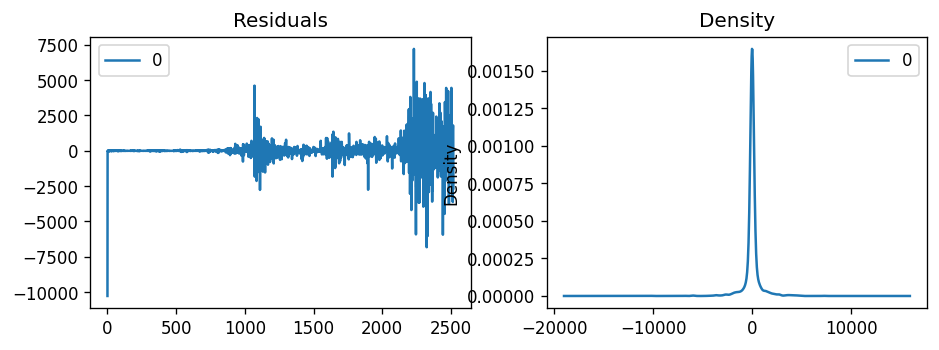

In [28]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [29]:
# Forecast
forecast_result = model_fit.forecast(150, alpha=0.05)  # 95% conf
forecast_result[:30]

array([56645.21587596, 56690.42772826, 56887.08197608, 57015.03108253,
       56696.16445746, 56500.72293088, 56667.62575266, 56817.11474122,
       56797.45349972, 56777.80061992, 56758.15609827, 56738.5199312 ,
       56718.89211516, 56699.2726466 , 56679.66152198, 56660.05873774,
       56640.46429033, 56620.87817622, 56601.30039185, 56581.73093368,
       56562.16979818, 56542.6169818 , 56523.07248101, 56503.53629226,
       56484.00841203, 56464.48883677, 56444.97756297, 56425.47458708,
       56405.97990558, 56386.49351495])

In [30]:
test_data[:30]

array([57748.79317379, 57198.1838463 , 58897.846983  , 53827.79286503,
       54533.40388243, 57237.66113709, 57848.77353713, 57011.28047424,
       57169.37199381, 56508.26805402, 53785.96717238, 49161.99070958,
       49268.46989054, 50461.57683654, 50647.66340636, 50530.45806459,
       47885.87198942, 47303.56415217, 49242.30232407, 50051.07834867,
       46696.30469947, 48410.56465631, 48936.86258244, 47694.53050225,
       46328.69636544, 46970.05705073, 46807.04861643, 47117.00820421,
       49145.2172585 , 48755.89564404])

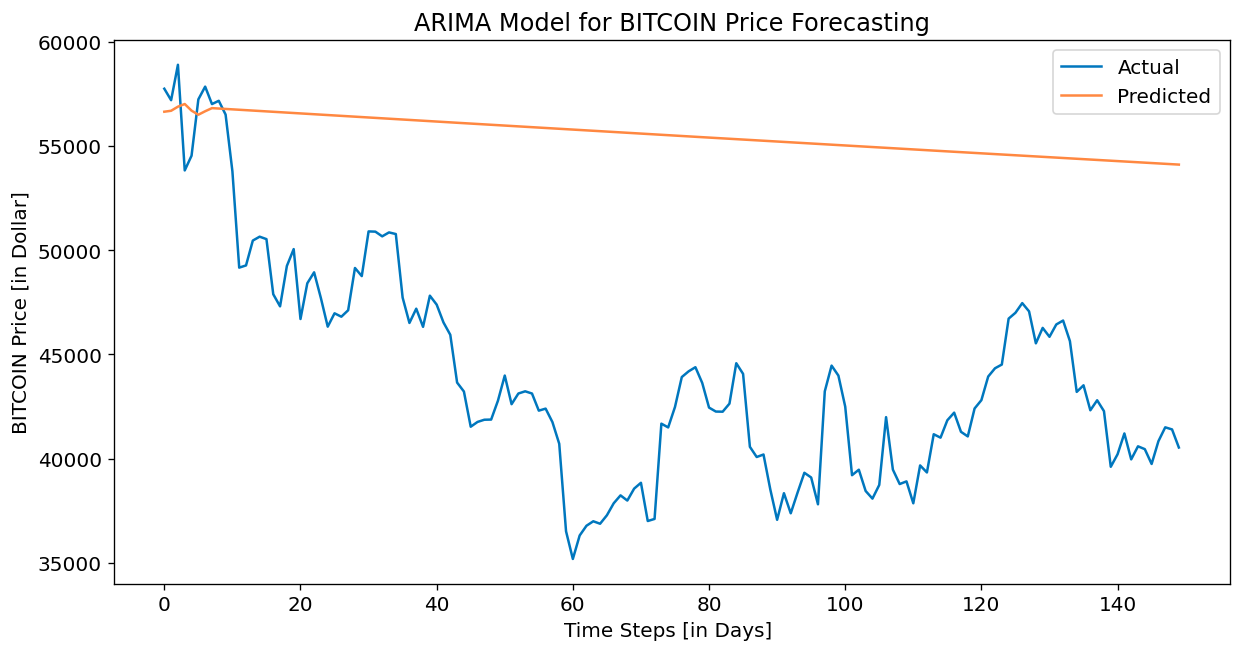

In [31]:
# Here we're plotting Test and Predicted data

plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 12})
plt.plot(test_data[:150], '#0077be',label = 'Actual')
plt.plot(forecast_result[:], '#ff8841',label = 'Predicted')
plt.title('ARIMA Model for BITCOIN Price Forecasting')
plt.ylabel('BITCOIN Price [in Dollar]')
plt.xlabel('Time Steps [in Days] ')
plt.legend()
plt.show()

In [32]:
data = dataset2['price'].values
print('Shape of data: ', data.shape)

Shape of data:  (3148,)


In [33]:
# Separate train and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Train length:  2518
Shape of Train and Test data:  (2518,) (630,)


In [34]:
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Shape of Train and Test data:  (2518, 1) (630, 1)


In [35]:
# split a univariate sequence into supervised learning [Input and Output]
def create_dataset(dataset, lookback):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookback -1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        b = dataset[i+lookback, 0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


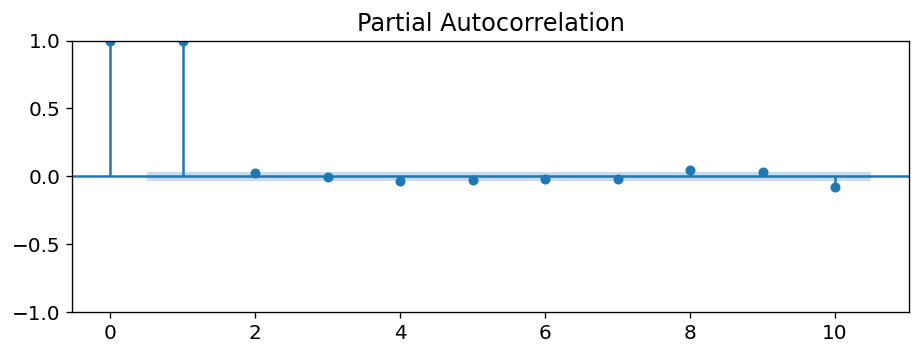

In [36]:
plot_pacf(data, lags=10)
plt.show()

In [37]:
from statsmodels.tsa.stattools import pacf
pacf_value = pacf(data, nlags=20)
lag = 0
# collect lag values greater than 10% correlation 
for x in pacf_value:
    if x > 0.1:
        lag += 1
    else:
        break
print('Selected look_back (or lag = ): ', lag)

Selected look_back (or lag = ):  2


In [38]:
train_X, train_y = create_dataset(train_data, lag)
test_X, test_y = create_dataset(test_data, lag)

In [39]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (2515, 2) (2515,)
Shape of test_X and test_y:  (627, 2) (627,)


In [40]:
print(train_data[:20])            # original data
for x in range(len(train_X[:20])):
    print(test_X[x], test_y[x], )            # trainX and trainY after lookback

[[313.992    ]
 [314.446    ]
 [286.572    ]
 [260.936    ]
 [273.22     ]
 [285.3738   ]
 [295.8725   ]
 [284.4525   ]
 [289.5738   ]
 [274.533    ]
 [267.184    ]
 [268.3536677]
 [221.436    ]
 [172.1479   ]
 [210.5559   ]
 [205.816    ]
 [199.4914   ]
 [208.9892   ]
 [214.545    ]
 [210.5137   ]]
[57748.79317379 57198.1838463 ] 58897.84698299794
[57198.1838463 58897.846983 ] 53827.79286503472
[58897.846983   53827.79286503] 54533.40388242691
[53827.79286503 54533.40388243] 57237.66113709043
[54533.40388243 57237.66113709] 57848.77353712989
[57237.66113709 57848.77353713] 57011.28047424234
[57848.77353713 57011.28047424] 57169.37199381056
[57011.28047424 57169.37199381] 56508.26805402271
[57169.37199381 56508.26805402] 53785.96717237922
[56508.26805402 53785.96717238] 49161.99070957517
[53785.96717238 49161.99070958] 49268.46989053938
[49161.99070958 49268.46989054] 50461.57683653979
[49268.46989054 50461.57683654] 50647.66340635755
[50461.57683654 50647.66340636] 50530.4580645934
[5

In [41]:
# Fix random seed for reproducibility
# Thes seed value helps in initilizing random weights and biases to the neural network.  
np.random.seed(7)

In [42]:
# ML libraries
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import keras

In [43]:
model = Sequential()
model.add(Dense(64, input_dim = lag, activation='relu', name= "1st_hidden"))
# model.add(Dense(64, activation='relu', name = '2nd_hidden'))
model.add(Dense(1, name = 'Output_layer', activation='linear'))
# model.add(Activation("linear", name = 'Linear_activation'))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_hidden (Dense)           (None, 64)                192       
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [44]:
epoch_number = 100
batches = 64

history = model.fit(train_X, train_y, epochs = epoch_number, batch_size = batches, verbose = 1, shuffle=False, 
                    validation_split=0.1)

Epoch 1/100
36/36 [==============================] - 2s 6ms/step - loss: 3751841.7500 - val_loss: 8319261.5000
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 1312162.3750 - val_loss: 15103492.0000
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 975843.1250 - val_loss: 8324325.5000
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 731859.7500 - val_loss: 9647827.0000
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 675280.7500 - val_loss: 5653142.0000
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 618156.1875 - val_loss: 7885256.0000
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 635994.5000 - val_loss: 5139169.5000
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 634401.5625 - val_loss: 7299307.0000
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 710490.6250 - val_loss: 5103082.0000
Epoch 1

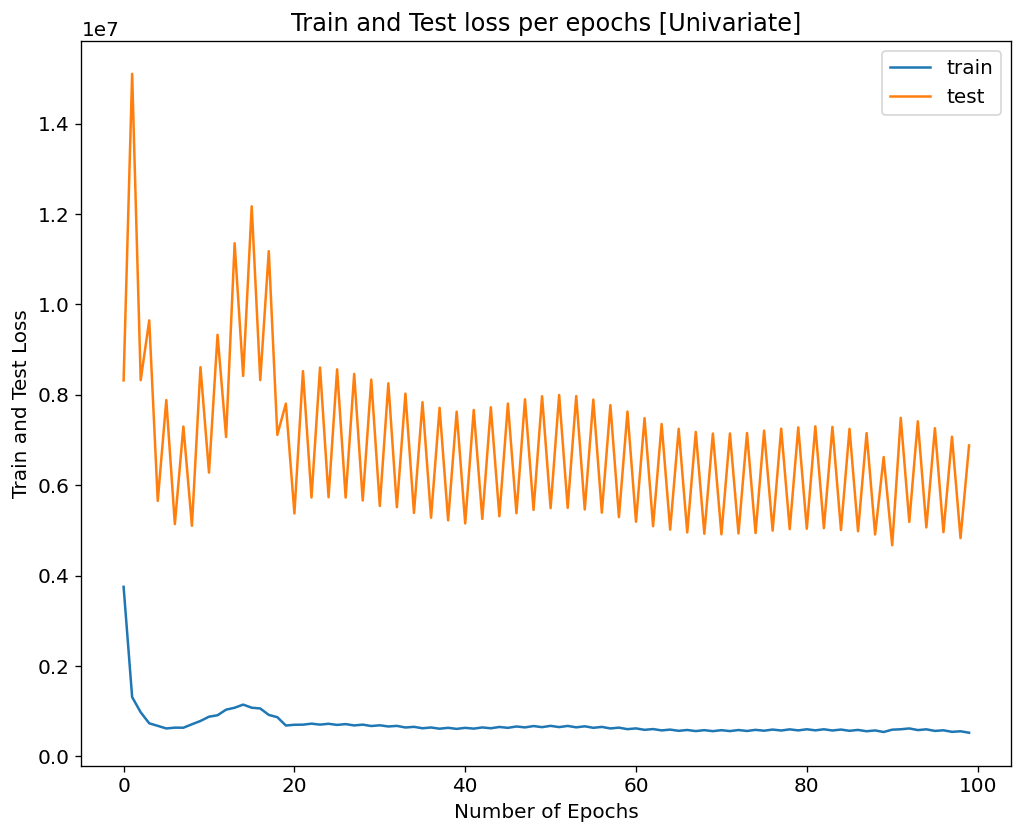

In [45]:
# plot history
plt.clf
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Number of Epochs')
plt.ylabel('Train and Test Loss')
plt.title('Train and Test loss per epochs [Univariate]')
plt.legend()
plt.show()

In [46]:
# Make prediction
testPredict = model.predict(test_X)
predicted_value = testPredict[:, 0]

In [47]:
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

def evaluate_forecast_results(actual, predicted):
    print('R2 Score: ', round(r2_score(actual, predicted), 2))
    print('MAE : ', round(mae(actual, predicted), 2))
    print('MSE: ', round(mean_squared_error(actual,predicted), 2))
    print('RMSE: ', round(math.sqrt(mean_squared_error(actual,predicted)), 2))
    print('NRMSE: ', NRMSE(actual, predicted))
    print('WMAPE: ', WMAPE(actual, predicted))
    
def NRMSE(actual, predicted):
    rmse = math.sqrt(mean_squared_error(actual,predicted))
    nrmse = rmse / np.mean(actual)
    return round(nrmse, 4)

def WMAPE(actual, predicted):
    abs_error = np.sum(actual - predicted)
    wmape = abs_error / np.sum(actual)
    return round(wmape, 4)

In [48]:
evaluate_forecast_results(test_y, predicted_value)

R2 Score:  0.97
MAE :  1214.1
MSE:  2436751.93
RMSE:  1561.01
NRMSE:  0.0541
WMAPE:  -0.0381


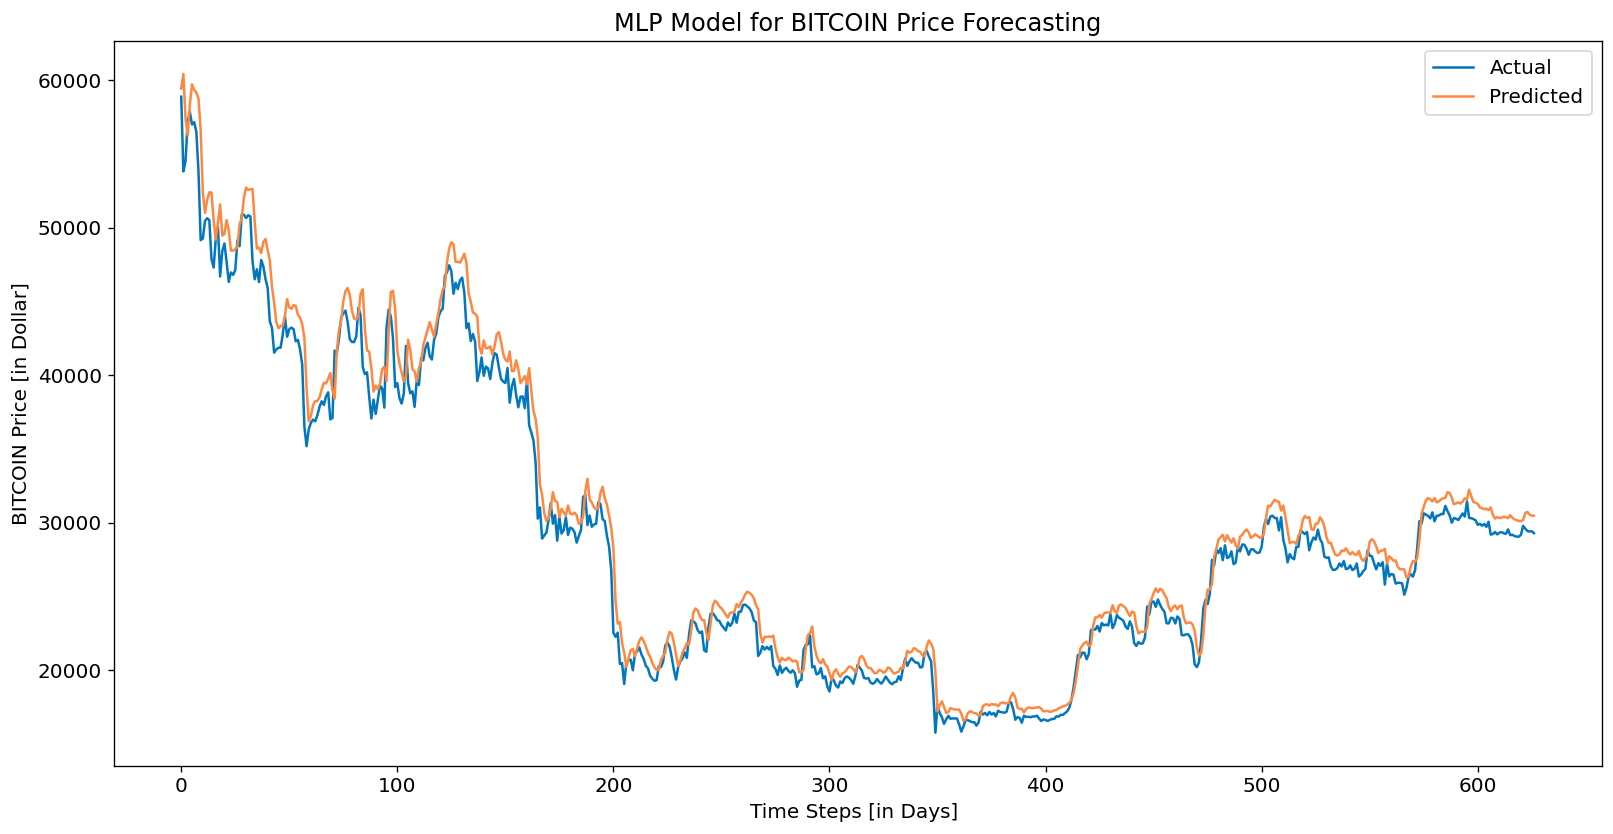

In [49]:
# Here we're plotting Test and Predicted data

plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 12})
plt.plot(test_y[:], '#0077be',label = 'Actual')
plt.plot(predicted_value, '#ff8841',label = 'Predicted')
plt.title('MLP Model for BITCOIN Price Forecasting')
plt.ylabel('BITCOIN Price [in Dollar]')
plt.xlabel('Time Steps [in Days] ')
plt.legend()
plt.show()

In [50]:
data = dataset2['price'].values
print('Shape of data: ', data.shape)

Shape of data:  (3148,)


In [51]:
# Separate train and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  2518
Shape of Train and Test data:  2518 630


In [52]:
# split a univariate sequence into supervised learning [Input and Output]
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [53]:
from statsmodels.tsa.stattools import pacf
pacf_value = pacf(data, nlags=20)
lag = 0
# collect lag values greater than 10% correlation 
for x in pacf_value:
    if x > 0.1:
        lag += 1
    else:
        break
print('Selected look_back (or lag = ): ', lag)

Selected look_back (or lag = ):  2


In [54]:
n_features = 1

In [55]:
train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

In [56]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (2516, 2) (2516,)
Shape of test_X and test_y:  (628, 2) (628,)


In [57]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

In [58]:
# New shape of train_X and test_X are :-
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (2516, 2, 1) (2516,)
Shape of test_X and test_y:  (628, 2, 1) (628,)


In [59]:
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dense

In [60]:
# define model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', return_sequences=False, input_shape=(lag, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                4224      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [61]:
# As you are trying to use function decorator in TF 2.0, 
# please enable run function eagerly by using below line after importing TensorFlow:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [62]:
# fit model
cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
history = model.fit(train_X, train_y, epochs = 150, batch_size=64, verbose=1, validation_split= 0.1, 
                   callbacks=[cb])

Epoch 1/150
 9/36 [======>.......................] - ETA: 0s - loss: 66878160.0000

/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


36/36 [==============================] - 1s 17ms/step - loss: 27215664.0000 - val_loss: 4531796.5000
Epoch 2/150
36/36 [==============================] - 1s 17ms/step - loss: 624525.3750 - val_loss: 4446196.0000
Epoch 3/150
36/36 [==============================] - 1s 17ms/step - loss: 356476.4062 - val_loss: 4585782.0000
Epoch 4/150
36/36 [==============================] - 1s 17ms/step - loss: 343310.7812 - val_loss: 4388836.0000
Epoch 5/150
36/36 [==============================] - 1s 15ms/step - loss: 341997.1250 - val_loss: 4735814.0000
Epoch 6/150
36/36 [==============================] - 1s 16ms/step - loss: 345168.2500 - val_loss: 4720854.5000
Epoch 7/150
36/36 [==============================] - 1s 15ms/step - loss: 347682.5938 - val_loss: 4324829.5000
Epoch 8/150
36/36 [==============================] - 1s 16ms/step - loss: 375122.1562 - val_loss: 5055061.5000
Epoch 9/150
36/36 [==============================] - 1s 16ms/step - loss: 346057.5312 - val_loss: 4181267.2500
Epoch 10/15

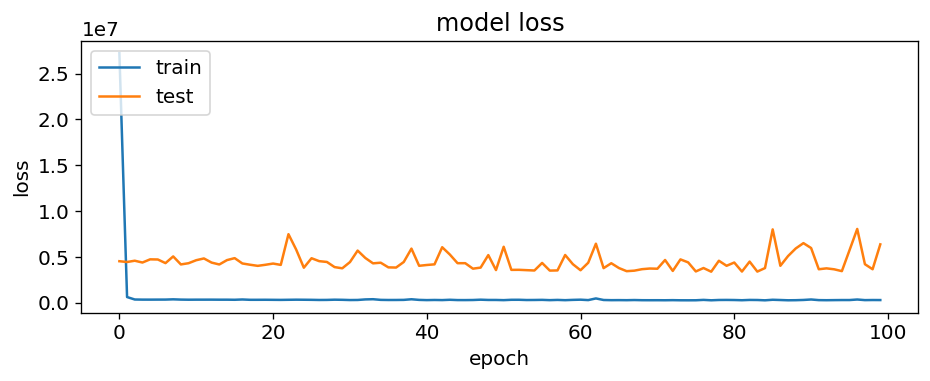

In [63]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

Shape of train and test predict:  (2516, 1) (628, 1)


In [65]:
actual_ = test_y
predicted_ = test_predict[:, 0]
len(actual_), len(predicted_)

(628, 628)

In [66]:
evaluate_forecast_results(actual_, predicted_)

R2 Score:  0.99
MAE :  713.2
MSE:  1151381.28
RMSE:  1073.02
NRMSE:  0.0372
WMAPE:  -0.0142


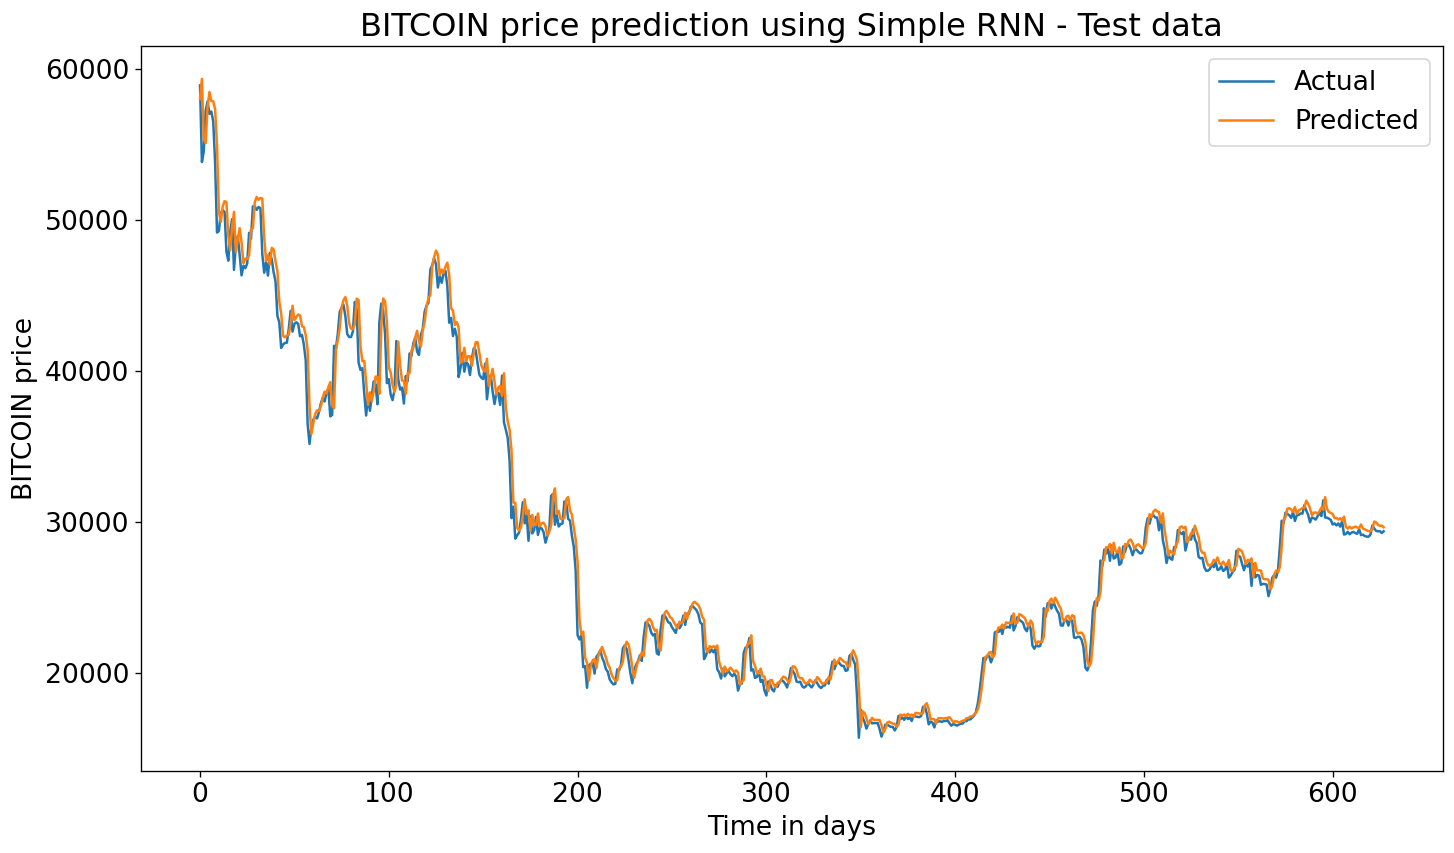

In [67]:
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.plot(actual_, label = 'Actual')
plt.plot(predicted_, label = 'Predicted')
plt.xlabel('Time in days')
plt.ylabel('BITCOIN price')
plt.title('BITCOIN price prediction using Simple RNN - Test data')
plt.legend()
plt.show()

In [68]:
df_train = pd.DataFrame(columns = ['Train data'])
df_train['Train data'] = train_data

df = pd.DataFrame(columns = ['Test data', 'Predicted data'])
df['Test data'] = actual_
df['Predicted data'] = predicted_

total_len = len(df_train['Train data']) + len(df['Test data'])
range(len(df_train['Train data']), total_len)
x_list = [x for x in range(len(df_train['Train data']), total_len)]
df.index = x_list

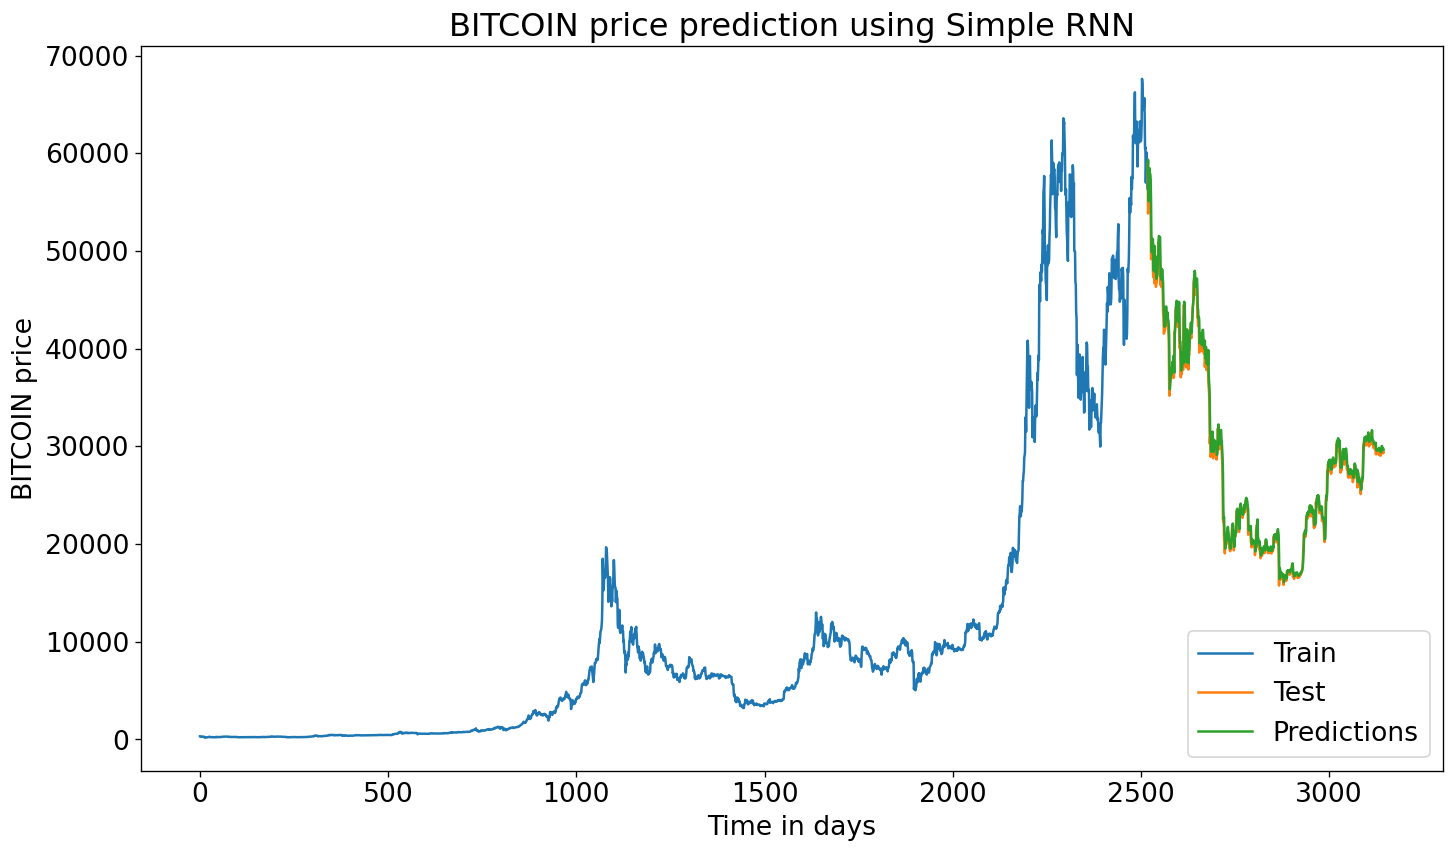

In [69]:
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.xlabel('Time in days')
plt.ylabel('BITCOIN price')
plt.title('BITCOIN price prediction using Simple RNN')
plt.plot(df_train['Train data'])
plt.plot(df[['Test data', 'Predicted data']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [70]:
data = dataset2['price'].values
print('Shape of data: ', data.shape)

Shape of data:  (3148,)


In [71]:
# Separate train and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)
train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  2518
Shape of Train and Test data:  2518 630


In [72]:
# split a univariate sequence into supervised learning [Input and Output]
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [73]:
lag = 2  # Already this is calculated in 5.4 and 6.4 
n_features = 1

In [74]:
train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (2516, 2) (2516,)
Shape of test_X and test_y:  (628, 2) (628,)


In [75]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

# New shape of train_X and test_X are :-
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (2516, 2, 1) (2516,)
Shape of test_X and test_y:  (628, 2, 1) (628,)


In [76]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [77]:
# define model
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(lag, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 64)             16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [78]:
# As you are trying to use function decorator in TF 2.0, 
# please enable run function eagerly by using below line after importing TensorFlow:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [79]:
# fit model
cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
history = model.fit(train_X, train_y, epochs = 150, batch_size = 64, verbose=1, validation_split= 0.1, 
                   callbacks = [cb])

Epoch 1/150
 3/36 [=>............................] - ETA: 0s - loss: 100012992.0000

/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


36/36 [==============================] - 1s 28ms/step - loss: 88326760.0000 - val_loss: 1130802944.0000
Epoch 2/150
36/36 [==============================] - 1s 25ms/step - loss: 14644618.0000 - val_loss: 32055714.0000
Epoch 3/150
36/36 [==============================] - 1s 26ms/step - loss: 524717.0625 - val_loss: 6331529.5000
Epoch 4/150
36/36 [==============================] - 1s 26ms/step - loss: 395185.3750 - val_loss: 5053550.5000
Epoch 5/150
36/36 [==============================] - 1s 26ms/step - loss: 402653.8438 - val_loss: 5017621.0000
Epoch 6/150
36/36 [==============================] - 1s 27ms/step - loss: 376394.2500 - val_loss: 5035722.5000
Epoch 7/150
36/36 [==============================] - 1s 26ms/step - loss: 402667.9688 - val_loss: 5391146.5000
Epoch 8/150
36/36 [==============================] - 1s 27ms/step - loss: 397735.2188 - val_loss: 4959906.5000
Epoch 9/150
36/36 [==============================] - 1s 26ms/step - loss: 378572.5000 - val_loss: 4902204.0000
Epoch

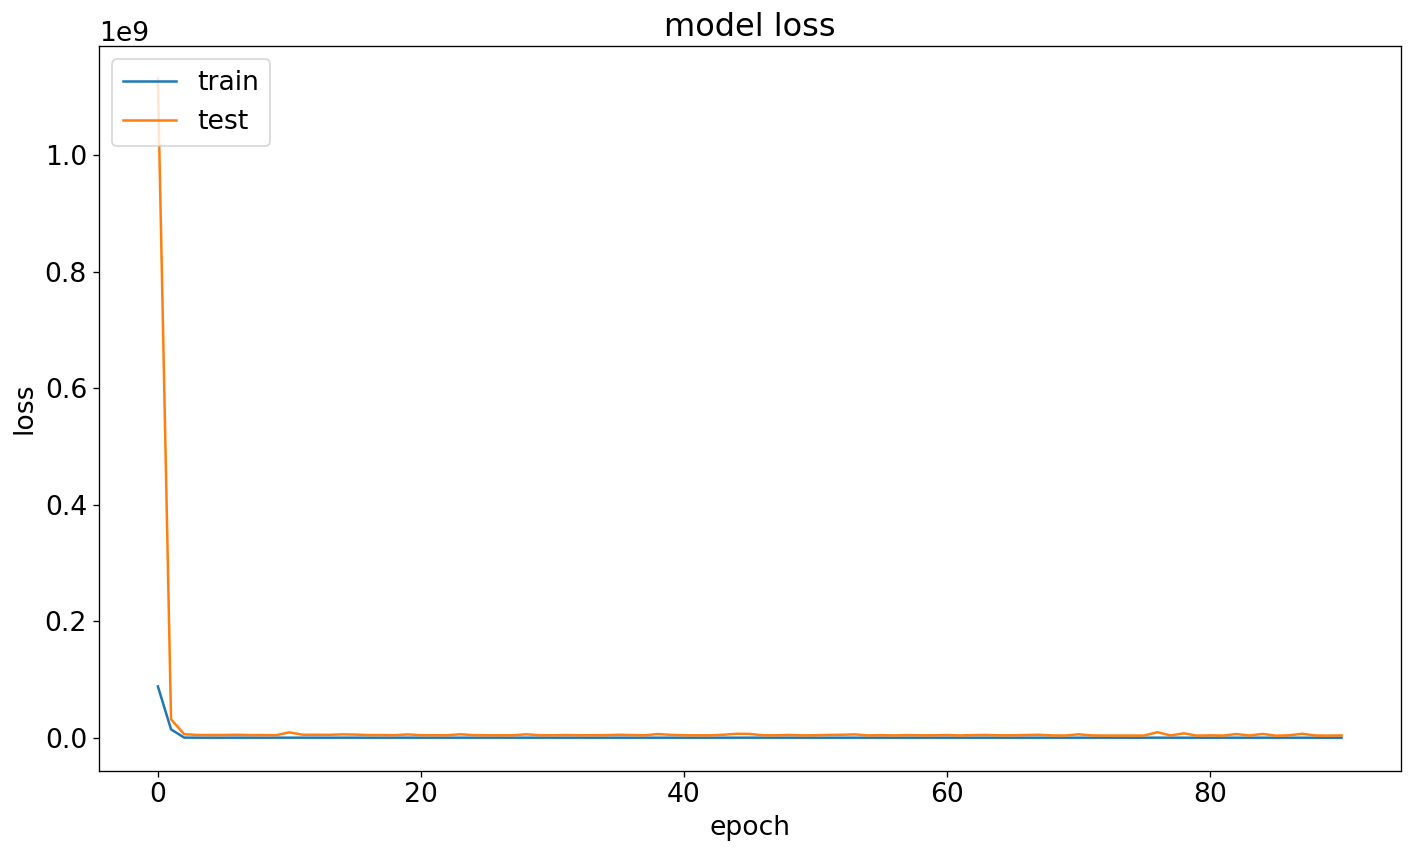

In [80]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [81]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

Shape of train and test predict:  (2516, 1) (628, 1)


In [82]:
actual_lstm = test_y
predicted_lstm = test_predict[:, 0]
evaluate_forecast_results(actual_lstm, predicted_lstm)

R2 Score:  0.99
MAE :  701.04
MSE:  1142930.1
RMSE:  1069.08
NRMSE:  0.037
WMAPE:  0.0039


In [83]:
df_train = pd.DataFrame(columns = ['Train data'])
df_train['Train data'] = train_data

df = pd.DataFrame(columns = ['Test data', 'Predicted data'])
df['Test data'] = actual_lstm
df['Predicted data'] = predicted_lstm

total_len = len(df_train['Train data']) + len(df['Test data'])
range(len(df_train['Train data']), total_len)
x_list = [x for x in range(len(df_train['Train data']), total_len)]
df.index = x_list

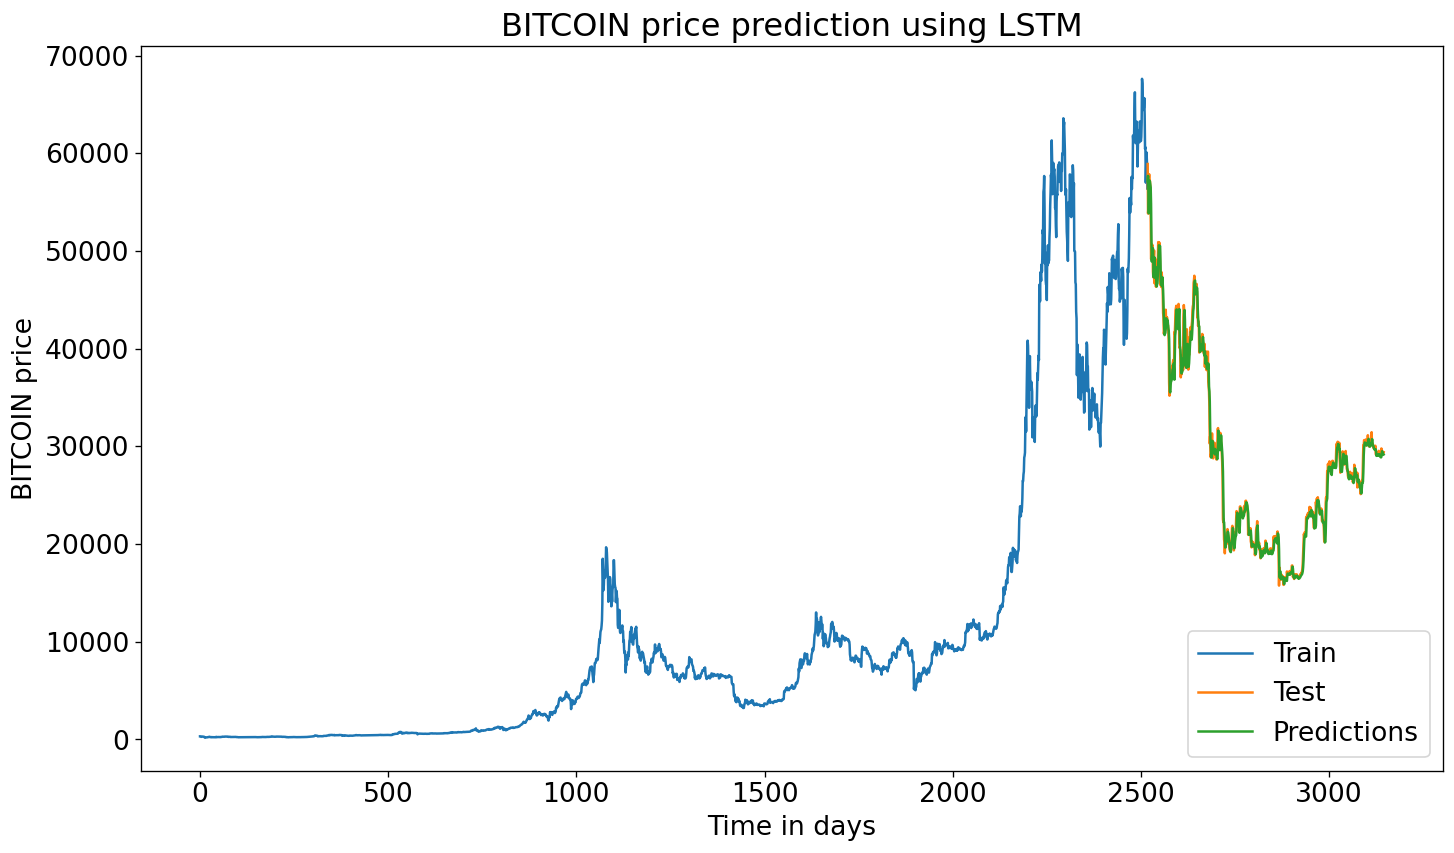

In [84]:
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.xlabel('Time in days')
plt.ylabel('BITCOIN price')
plt.title('BITCOIN price prediction using LSTM')
plt.plot(df_train['Train data'])
plt.plot(df[['Test data', 'Predicted data']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()